In [1]:
import MeCab
m = MeCab.Tagger()
out = m.parse("미캅 설치 제발")
print(out)

미	NNP,인명,F,미,*,*,*,*
캅	NNP,인명,T,캅,*,*,*,*
설치	NNG,행위,F,설치,*,*,*,*
제발	NNG,*,T,제발,*,*,*,*
EOS



In [409]:
#텍스트 전처리
import csv
import pandas as pd
import re

'''file_path = 'crawling_1_400_new (1) (1).csv'  # 파일 경로를 적절히 변경하세요.
df = pd.read_csv(file_path, encoding='CP949')
text = df['내용']
text = text.str.strip()
text = text.str.replace('\n', '')

# 추출한 데이터 확인
print(text)'''


# CSV 파일 불러오기
file_path = 'crawling_1_400_new (1) (1).csv'  # 파일 경로를 적절히 변경하세요.
with open(file_path, newline='', encoding = 'CP949') as csvfile:
    reader = csv.DictReader(csvfile)

    # 원하는 열의 데이터 추출
    column_name = '내용'  # 추출하려는 열의 이름을 적절히 변경하세요.
    text = []
    for row in reader:
        content = row[column_name]
        # '제안 이유'와 '주요 내용'을 제거한 후에 text 리스트에 추가합니다.
        content_without_reason = content.replace('제안이유', '').replace('주요내용', '').replace('및','').replace('■ ', '').replace('참고사항', '')
        content_without_ko = content_without_reason.replace('가.', '').replace('나.', '').replace('다.', '').replace('라.', '').replace('마.', '').replace('바.', '').replace('사.', '').replace('아.', '').replace('자.', '').replace('차.', '').replace('카.', '').replace('타.', '').replace('파.', '').replace('하.', '')
        text.append(content_without_ko)


In [13]:
pip install kiwipiepy

DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



     ---------------------------------------- 0.0/34.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/34.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/34.7 MB 1.6 MB/s eta 0:00:22
     ---------------------------------------- 0.4/34.7 MB 3.2 MB/s eta 0:00:11
      --------------------------------------- 0.7/34.7 MB 4.5 MB/s eta 0:00:08
     - -------------------------------------- 1.1/34.7 MB 5.2 MB/s eta 0:00:07
     - -------------------------------------- 1.3/34.7 MB 4.9 MB/s eta 0:00:07
     - -------------------------------------- 1.6/34.7 MB 5.5 MB/s eta 0:00:07
     -- ------------------------------------- 2.0/34.7 MB 5.7 MB/s eta 0:00:06
     -- ------------------------------------- 2.3/34.7 MB 5.5 MB/s eta 0:00:06
     -- ------------------------------------- 2.6/34.7 MB 5.9 MB/s eta 0:00:06
     --- ------------------------------------ 2.9/34.7 MB 5.8 MB/s eta 0:00:06
     --- ------------------------------------ 3.1/34.7 MB 5.9 MB/

In [412]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']
tokenized_docs = []
for words in text:
    nouns_ = []
    for word in kiwi.tokenize(words):
        if word[1] in noun_list and len(word[0])>1:
            nouns_.append(word[0])
    tokenized_docs.append(nouns_)
print(tokenized_docs[0])      

"noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']\ntokenized_docs = []\nfor words in text:\n    nouns_ = []\n    for word in kiwi.tokenize(words):\n        if word[1] in noun_list and len(word[0])>1:\n            nouns_.append(word[0])\n    tokenized_docs.append(nouns_)\nprint(tokenized_docs[0])"

In [44]:
import gensim
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(tokenized_docs)

In [34]:
from collections import Counter
noun_frequencies = Counter(tokenized_docs[0])

# 가장 빈도가 높은 명사 순으로 출력
print(noun_frequencies.most_common())

[('조정', 12), ('관리', 11), ('집합', 11), ('건물', 10), ('분쟁', 10), ('위원회', 5), ('관련', 4), ('관리인', 4), ('공동', 3), ('주택', 3), ('관리비', 3), ('지방', 3), ('자치', 3), ('단체', 3), ('조사', 3), ('감사', 3), ('경우', 3), ('신설', 3), ('주상', 2), ('복합', 2), ('상가', 2), ('오피스텔', 2), ('투명', 2), ('운영', 2), ('갈등', 2), ('발생', 2), ('감독', 2), ('업무', 2), ('사항', 2), ('규정', 2), ('설치', 2), ('실효', 2), ('법률', 2), ('위반', 2), ('소송', 2), ('진행', 2), ('특별', 2), ('사정', 2), ('주민', 2), ('행위', 2), ('수행', 2), ('효율', 2), ('필요', 2), ('비리', 2), ('신고', 2), ('아파트', 1), ('체계', 1), ('반면', 1), ('공적', 1), ('기준', 1), ('미비', 1), ('최근', 1), ('증가', 1), ('규모', 1), ('대형', 1), ('거주민', 1), ('당사자', 1), ('다양', 1), ('형태', 1), ('정보', 1), ('공개', 1), ('지자체', 1), ('세부', 1), ('미흡', 1), ('민원', 1), ('해결', 1), ('사용', 1), ('내역', 1), ('강제력', 1), ('실정', 1), ('부여', 1), ('구분', 1), ('소유자', 1), ('권익', 1), ('보호', 1), ('결과', 1), ('부정', 1), ('직무', 1), ('적합', 1), ('해임', 1), ('임시', 1), ('선임', 1), ('법원', 1), ('청구', 1), ('복리', 1), ('증진', 1), ('안전', 1), ('자료', 1), ('제출', 1), ('명령

In [48]:
from collections import Counter

# tokenized_docs가 리스트인 경우, 리스트 안의 리스트를 하나의 리스트로 펼치기
flat_tokenized_docs = [word for sublist in tokenized_docs for word in sublist]

# 명사 빈도수 계산
noun_frequencies = Counter(flat_tokenized_docs)

# 가장 빈도가 높은 명사 순으로 출력
print(noun_frequencies.most_common())

[('경우', 504), ('신설', 329), ('규정', 313), ('지원', 275), ('위원회', 268), ('필요', 263), ('현행법', 254), ('사업', 237), ('기관', 236), ('운영', 205), ('정보', 199), ('관리', 198), ('지방', 192), ('발생', 189), ('국가', 187), ('단체', 179), ('지역', 174), ('아동', 169), ('주택', 166), ('장관', 163), ('조사', 158), ('관련', 157), ('자치', 144), ('보호', 142), ('해당', 139), ('의무', 137), ('법률', 136), ('국회', 135), ('교육', 134), ('설치', 133), ('대상', 133), ('사업자', 133), ('제도', 131), ('피해', 131), ('제한', 129), ('시설', 128), ('기간', 128), ('업무', 127), ('범죄', 123), ('이용', 122), ('마련', 121), ('이상', 120), ('도시', 119), ('상황', 115), ('산업', 115), ('근거', 115), ('정부', 114), ('청소년', 113), ('안전', 112), ('계획', 109), ('행위', 107), ('시장', 107), ('사항', 106), ('국민', 106), ('의결', 105), ('포함', 104), ('감염병', 104), ('개발', 103), ('강화', 100), ('기금', 100), ('의료', 99), ('학교', 99), ('일부', 98), ('사용', 97), ('제공', 97), ('조치', 97), ('처벌', 96), ('자동차', 96), ('최근', 93), ('지적', 91), ('경제', 91), ('공무원', 90), ('가능', 88), ('법률안', 88), ('안정', 87), ('부담', 86), ('신고', 85), ('이하', 

In [22]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 4.3 MB/s eta 0:00:06
    --------------------------------------- 0.4/24.0 MB 4.9 MB/s eta 0:00:05
   - -------------------------------------- 0.7/24.0 MB 5.7 MB/s eta 0:00:05
   - -------------------------------------- 1.0/24.0 MB 5.9 MB/s eta 0:00:04
   -- ------------------------------------- 1.3/24.0 MB 5.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.6/24.0 MB 6.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.9/24.0 MB 5.9 MB/s eta 0:00:04
   --- ------------------------------------ 2.2/24.0 MB 6.0 MB/s eta 0:00:04
   ---- ----------------------------------- 2.5/24.0 MB 6.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.8/24.0 MB 6.0 MB/s eta 0:00:04
   ----- ---------------------------------- 3.1/24.0 MB 6.2 MB/s eta 0:00:04
   ----- ---------------------------------- 3.4/24.0 MB 6.1 MB/s eta 0:00:04
   ---

DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [15]:
#경우, 신설, 규정, 지원, 위원회, 필요, 현행법, 사업, 기관, 운영 (상위 10개, 400개 문서 중 200번 이상인 토픽) 삭제   
# CSV 파일 불러오기
import csv
import pandas as pd
import re

file_path = 'crawling_1_400_new (1) (1).csv'  # 파일 경로를 적절히 변경하세요.
with open(file_path, newline='', encoding = 'CP949') as csvfile:
    reader = csv.DictReader(csvfile)

text = []
df = pd.read_csv(file_path, encoding='CP949')
for i in range(len(df['내용'])):
    content = df['내용'][i]
    content_without_reason = content.replace('제안이유', '').replace('주요내용', '').replace('및','').replace('■ ', '').replace('참고사항', '')
    content_without_ko = content_without_reason.replace('가.', '').replace('나.', '').replace('다.', '').replace('라.', '').replace('마.', '').replace('바.', '').replace('사.', '').replace('아.', '').replace('자.', '').replace('차.', '').replace('카.', '').replace('타.', '').replace('파.', '').replace('하.', '')
    content_without_gen = content_without_ko.replace('경우', '').replace('신설', '').replace('규정', '').replace('지원', '').replace('위원회', '').replace('필요', '').replace('현행법', '').replace('사업', '').replace('기관', '').replace('운영', '')
    
    pattern = r'\.\n|\.\s+\n'
    
    # 정규표현식을 사용하여 문장 분할
    sentences = re.split(pattern, content_without_gen)
    
    # 공백 제거 및 빈 문자열 제거
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    
    text.append(sentences)


In [350]:
text[1]

['현행법상 아파트 등 주택에 대한 재산세 과세표준은 국토교통부가 해마다 「부동산 가격공시에 관한 법률」에 따라 재평가하는 공시가격인 시가표준액에 공정시장가액비율을 곱한 가액으로 산정하고 있음',
 '납세자 입장에서 조세는 예측가능성이 담보되어야 하지만, 재산세의 에는 해마다 재평가하는 공시가격에 따라 부과액이 달라지다보니 납세자로부터의 많은 이의제기 등 불한 사회적 비용이 지출되고 있는 상황임',
 '특히 소득이 일정하거나 은퇴 후 특별한 소득이 없는 1세대 1주택자에게 부동산 가격 상승에 따른 재산세 증가는 조세부담으로 작용하고 있으며, 장기보유 1세대 1주택자에게는 재산세의 감면효과가 전혀 없는 실정임',
 '이에 주택에 대한 재산세의 과세표준을 최초 매입가에 공정시장가액비율을 곱하여 산정하도록 하여 주택에 부과되는 재산세에 대한 예측가능성을 높이고, 주택을 장기간 보유할수록 세제혜택이 돌아가도록 하여 주택시장 안정화에 기여하고자 함',
 '또한, 부동산 시장의 변동에 따라 주택가격이 하락하였을  재산세가 시장표준액을 기준으로 하였을 때 보다 많이 부담할 수 있는 우려를 해소하기 위하여 「부동산 가격공시에 관한 법률」에 따라 재평가하는 공시가격인 시가표준액에 공정시장가액비율을 곱한 가액으로 선택할 수 있도록 대통령령으로 정할 수 있도록 하였음(안 제110호)']

In [420]:
from kiwipiepy import Kiwi
import gensim
from gensim.corpora.dictionary import Dictionary

kiwi = Kiwi()

noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']
tokenized_docs = []
for words in text[0]:
    nouns_ = []
    for word in kiwi.tokenize(words):
        if word[1] in noun_list and len(word[0])>1:
            nouns_.append(word[0])
    tokenized_docs.append(nouns_)
print(tokenized_docs[1])       

"noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']\ntokenized_docs = []\nfor words in text[0]:\n    nouns_ = []\n    for word in kiwi.tokenize(words):\n        if word[1] in noun_list and len(word[0])>1:\n            nouns_.append(word[0])\n    tokenized_docs.append(nouns_)\nprint(tokenized_docs[1])"

In [222]:
import gensim
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(tokenized_docs)

In [210]:
corpus = [dictionary.doc2bow(text[0]) for text[0] in tokenized_docs]
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word = dictionary)
model.show_topic(1,10)

[('관리', 0.051223427),
 ('집합', 0.049819544),
 ('건물', 0.041624255),
 ('조정', 0.039104857),
 ('분쟁', 0.037041765),
 ('관리인', 0.035499364),
 ('지방', 0.026009599),
 ('자치', 0.025862968),
 ('조사', 0.02584442),
 ('감사', 0.025726397)]

In [67]:
#KIWI

from kiwipiepy import Kiwi
import gensim
from gensim.corpora.dictionary import Dictionary

kiwi = Kiwi()


#경우, 신설, 규정, 지원, 위원회, 필요, 현행법, 사업, 기관, 운영 (상위 10개, 400개 문서 중 200번 이상인 토픽) 삭제   
# CSV 파일 불러오기
file_path = 'crawling_1_400_new (1) (1).csv'
with open(file_path, newline='', encoding = 'CP949') as csvfile:
    reader = csv.DictReader(csvfile)

text = []
df = pd.read_csv(file_path, encoding='CP949')
for i in range(len(df['내용'])):
    content = df['내용'][i]
    content_without_reason = content.replace('제안이유', '').replace('주요내용', '').replace('및','').replace('■ ', '').replace('참고사항', '')
    content_without_ko = content_without_reason.replace('가.', '').replace('나.', '').replace('다.', '').replace('라.', '').replace('마.', '').replace('바.', '').replace('사.', '').replace('아.', '').replace('자.', '').replace('차.', '').replace('카.', '').replace('타.', '').replace('파.', '').replace('하.', '')
    content_without_gen = content_without_ko.replace('경우', '').replace('신설', '').replace('규정', '').replace('지원', '').replace('위원회', '').replace('필요', '').replace('현행법', '').replace('사업', '').replace('기관', '').replace('운영', '')
    
    pattern = r'\.\n|\.\s+\n'
    
    # 정규표현식을 사용하여 문장 분할
    sentences = re.split(pattern, content_without_gen)
    
    # 공백 제거 및 빈 문자열 제거
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    
    text.append(sentences)
    


for i in range(len(text)):
    noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']
    tokenized_docs = []
    for words in text[i]:
        nouns_ = []
        for word in kiwi.tokenize(words):
            if word[1] in noun_list and len(word[0])>1:
                nouns_.append(word[0])
        tokenized_docs.append(nouns_)
    dictionary = Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(text[i]) for text[i] in tokenized_docs]
    model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes=15, random_state =44)
    print(f'{i+1}번째 문서의 topic:', model.show_topic(1,10))

1번째 문서의 topic: [('관리', 0.010231302), ('주택', 0.010226529), ('건물', 0.010224239), ('복합', 0.010219281), ('집합', 0.010218216), ('오피스텔', 0.010218103), ('주상', 0.010215971), ('아파트', 0.010215919), ('공동', 0.010215264), ('발생', 0.010214983)]
2번째 문서의 topic: [('재산세', 0.016667731), ('주택', 0.016667686), ('가격', 0.016667394), ('부동산', 0.016667329), ('공정', 0.016667305), ('시장', 0.016667297), ('비율', 0.016667295), ('가액', 0.016667273), ('예측', 0.01666709), ('부과', 0.016667072)]
3번째 문서의 topic: [('회사', 0.062005274), ('주주', 0.053854227), ('상장', 0.04161207), ('구조', 0.017127275), ('법률', 0.017126918), ('지배', 0.017126342), ('시장', 0.017122857), ('법령', 0.01712264), ('상법', 0.013049221), ('금융', 0.013048949)]
4번째 문서의 topic: [('활용', 0.053948883), ('시장', 0.053941067), ('안정', 0.029426398), ('폐기물', 0.029420763), ('수거', 0.02941116), ('업체', 0.029410733), ('거부', 0.029409287), ('가격', 0.02940491), ('수도', 0.029399177), ('생활', 0.029398821)]
5번째 문서의 topic: [('발생', 0.07485557), ('위험', 0.040815137), ('작업자', 0.04081367), ('공사', 0.04081214

In [378]:
class CustomTokenizer:
    def __init__(self, kiwi):
        self.kiwi = kiwi
    def __call__(self, text):
        extract_pos_list = ['NNG', 'NNP', 'NNB', 'NR', 'NP'] 
        result = list()
        tokenized_docs = []
        for word in self.kiwi.tokenize(text):
            if word[1] in extract_pos_list and len(word[0])>1:
                result.append(word[0])
        tokenized_docs.append()
        return tokenized_docs

custom_tokenizer = CustomTokenizer(Kiwi())

In [235]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [386]:
text_ = text[0]+text[1]
print(text_)
print(text[0])

['아파트 등 공동주택은 「공동주택관리법」에 의해 체계적으로 관리되고 있는 반면, 주상복합·상가·오피스텔 등 집합건물은 공적 관리기준이 미비하여 불투명하게 운영되고 있고 최근 주상복합·오피스텔 등 집합건물이 증가하고 규모가 대형화됨에 따라 거주민 간 혹은 당사자 간 다양한 형태의 분쟁과 갈등이 발생하고 있음', '특히 집합건물법은 「공동주택관리법」과 달리 관리비 정보공개  지자체의 감독 등 관리업무에 대한 세부사항에 대한 이 미흡하여 집합상가에서 관리비 관련 민원이 자주 발생하고 있음', '또한, 집합건물과 관련한 분쟁을 해결하기 위해 각 시·도에 ‘분쟁조정’를 설치해 관리비의 사용내역과 관련된 분쟁을 조정하도록 하고 있지만, 조정의 강제력이 없어 실효성이 없는 실정임', '이에 집합건물의 갈등  분쟁 조정을 위해 지방자치단체의 장에게 분쟁 조정, 법률 위반 등의 사항에 대하여 조사 또는 감사를 할 수 있도록 감독권을 부여하고, 분쟁조정의 실효성을 높이기 위해 소송진행 등 특별한 사정이 없는  분쟁조정에 응하도록 하여 집합건물 관리의 투명성을 높이고, 구분소유자 등 입주민의 권익을 보호하고자 함', '지방자치단체의 장은 조사 또는 감사 결과 관리인에게 부정한 행위나 그 밖에 그 직무를 수행하기에 적합하지 아니할  관리인의 해임과 임시관리인의 선임을 법원에 청구할 수 있음(안 제24조제6항 )', '지방자치단체의 장은 집합건물의 효율적인 관리와 주민의 복리증진을 위하여 분쟁조정, 안전관리, 법률 위반을 비롯하여 감사에 한  관리 또는 관리인에게 자료 제출이나 그 밖에 한 명령을 할 수 있으며, 집합건물의 시설·장부·서류 등을 조사 또는 검사하게 할 수 있도록 함(안 제26조의5 )', '법무부장관은 집합건물 관리비리와 관련된 불법 행위 신고의 접수·처리 등에 관한 업무를 효율적으로 수행하기 위하여 집합건물 관리비리 신고센터를 설치·운영할 수 있도록 함(안 제26조의6 )', '분쟁조정의 조정신청에 대해 소송진행 등 특별한 사정이 없으면 7일 이내에 답변서를 조정

In [388]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
tokens = [tokenizer(sentence, return_tensors='pt', truncation = True, max_length=512) for sentence in text_]

In [390]:
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

with torch.no_grad():
    sentence_embeddings = [model(**token).last_hidden_state.mean(dim=1).numpy() for token in tokens]

sentence_embeddings_mean = np.mean(sentence_embeddings, axis=1)
cosine_similarities = cosine_similarity(sentence_embeddings_mean, sentence_embeddings_mean)
important_sentences = np.argsort(cosine_similarities.sum(axis=1))[-1:]
summary = ''.join([sentences[i] for i in important_sentences])
print(sentence_embeddings_mean)

IndexError: list index out of range

In [30]:
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
import konlpy

from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

from kiwipiepy import Kiwi
import gensim
from gensim.corpora.dictionary import Dictionary

kiwi = Kiwi()
class CustomTokenizer:
    def __init__(self, kiwi):
        self.kiwi = kiwi
    def __call__(self, text):
        extract_pos_list = ['NNG', 'NNP', 'NNB', 'NR', 'NP'] 
        result = list()
        tokenized_docs = []
        for word in self.kiwi.tokenize(text):
            if word[1] in extract_pos_list and len(word[0])>1:
                result.append(word[0])
        return result

vector_keywords=[]
for i in range(len(text)):
    
    custom_tokenizer = CustomTokenizer(Kiwi())
    vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=3000)
    # 텍스트 데이터를 토큰화하고 벡터 피쳐 추출
    X = vectorizer.fit_transform(text[i])
    vector_keywords.append(X.toarray())

    # 피쳐 이름 확인
'''feature_names = vectorizer.get_feature_names_out()

    # 벡터 피쳐 출력
    print(X.toarray())
    print("Feature names:", feature_names)'''

# BERTopic 모델 초기화
'''model = BERTopic(embedding_model="sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens",
                 language='multiligual',
                 vectorizer_model=vectorizer,  # CountVectorizer를 사용하여 단어 수 제한
                 nr_topics="auto")

# 문단별 키워드 리스트를 사용하여 토픽 모델링
topics, probs = model.fit_transform(text[0])

# 토픽 정보 출력
print(model.get_topic_info())'''



'model = BERTopic(embedding_model="sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens",\n                 language=\'multiligual\',\n                 vectorizer_model=vectorizer,  # CountVectorizer를 사용하여 단어 수 제한\n                 nr_topics="auto")\n\n# 문단별 키워드 리스트를 사용하여 토픽 모델링\ntopics, probs = model.fit_transform(text[0])\n\n# 토픽 정보 출력\nprint(model.get_topic_info())'

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# 주어진 데이터셋
# 400개의 리스트, 각 리스트는 10개의 99개 이진 숫자로 구성

# 데이터 전처리: 리스트를 numpy 배열로 변환
X = np.array(vector_keywords)

# K-means 군집화
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# 각 데이터 포인트가 어떤 클러스터에 속하는지 출력
print(clusters)

In [32]:
custom_tokenizer = CustomTokenizer(Kiwi())
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=3000)
# 텍스트 데이터를 토큰화하고 벡터 피쳐 추출
X = vectorizer.fit_transform(text[0])
feature_names = vectorizer.get_feature_names_out()

# 벡터 피쳐 출력
print(X.toarray())
print("Feature names:", feature_names)
len(

[[1 0 0 0 1 2 0 0 0 2 1 0 3 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0
  2 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 2 2 1 0 0 0 0 0 2 0 0 1 1 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 1 1 0 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 3 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 1 0 0 2 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
  0 1 0 4 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
  0 0 0 1 4 1 0 0 0 0 1 0 0 1 2 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
  0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 

In [69]:
from kiwipiepy import Kiwi
import gensim
from gensim.corpora.dictionary import Dictionary
import csv 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense


kiwi = Kiwi()


#경우, 신설, 규정, 지원, 위원회, 필요, 현행법, 사업, 기관, 운영 (상위 10개, 400개 문서 중 200번 이상인 토픽) 삭제   
# CSV 파일 불러오기
file_path = 'crawling_1_400_new (1) (1).csv'  # 파일 경로를 적절히 변경하세요.
with open(file_path, newline='', encoding = 'CP949') as csvfile:
    reader = csv.DictReader(csvfile)

text = []
df = pd.read_csv(file_path, encoding='CP949')
for i in range(len(df['내용'])):
    content = df['내용'][i]
    content_without_reason = content.replace('제안이유', '').replace('주요내용', '').replace('및','').replace('■ ', '').replace('참고사항', '')
    content_without_ko = content_without_reason.replace('가.', '').replace('나.', '').replace('다.', '').replace('라.', '').replace('마.', '').replace('바.', '').replace('사.', '').replace('아.', '').replace('자.', '').replace('차.', '').replace('카.', '').replace('타.', '').replace('파.', '').replace('하.', '')
    content_without_gen = content_without_ko.replace('경우', '').replace('신설', '').replace('규정', '').replace('지원', '').replace('위원회', '').replace('필요', '').replace('현행법', '').replace('사업', '').replace('기관', '').replace('운영', '')
    
    pattern = r'\.\n|\.\s+\n'
    
    # 정규표현식을 사용하여 문장 분할
    sentences = re.split(pattern, content_without_gen)
    
    # 공백 제거 및 빈 문자열 제거
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    
    text.append(sentences)
    
data = []
for i in range(len(text)):
    noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']
    tokenized_docs = []
    for words in text[i]:
        nouns_ = []
        for word in kiwi.tokenize(words):
            if word[1] in noun_list and len(word[0])>1:
                nouns_.append(word[0])
        tokenized_docs.append(nouns_)
    dictionary = Dictionary(tokenized_docs)
    corpus = [' '.join(doc) for doc in tokenized_docs]  # 리스트를 하나의 텍스트로 결합
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    data.append(X)





'''tfidf_model = TfidfModel(corpus)
tfidf_corpus = tfidf_model[data]

# TF-IDF 벡터화
X = corpus2dense(tfidf_corpus, num_terms=len(dictionary)).T

# K-means 군집화
kmeans = KMeans(n_clusters=13, random_state=42)
clusters = kmeans.fit_predict(X)'''

'''# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(doc) for doc in data])'''

# K-means 군집화
kmeans = KMeans(n_clusters=13, random_state=42)
clusters = kmeans.fit_predict(data)

# 결과 출력
for i in range(13):
    print(f"Cluster {i}: {np.sum(clusters == i)} samples")

'''from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# K-means 군집화
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# 결과 출력
for i in range(5):
    print(f"Cluster {i}: {np.sum(clusters == i)} samples")'''

ValueError: setting an array element with a sequence.

In [10]:
import csv
import pandas as pd
import re
from kiwipiepy import Kiwi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Kiwi 초기화
kiwi = Kiwi()


file_path = 'crawling_1_400_new (1) (1).csv'  # 파일 경로를 적절히 변경하세요.

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='CP949')


# 내용에서 불용어 제거
def tokenize_text(text):
    content_without_reason = text.replace('제안이유', '').replace('주요내용', '').replace('및','').replace('■ ', '').replace('참고사항', '')
    content_without_ko = content_without_reason.replace('가.', '').replace('나.', '').replace('다.', '').replace('라.', '').replace('마.', '').replace('바.', '').replace('사.', '').replace('아.', '').replace('자.', '').replace('차.', '').replace('카.', '').replace('타.', '').replace('파.', '').replace('하.', '')
    content_without_gen = content_without_ko.replace('경우', '').replace('신설', '').replace('규정', '').replace('지원', '').replace('위원회', '').replace('필요', '').replace('현행법', '').replace('사업', '').replace('기관', '').replace('운영', '')
    tokens = kiwi.analyze(content_without_gen)
    nouns = ''
    noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']
    for word in tokens[0][0]:
        if word[1] in noun_list and len(word[0]) > 1:
            nouns += (word[0]+' ')
    return nouns

# TF-IDF 벡터화
#vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['내용'].apply(tokenize_text))

# K-means 군집화
kmeans = KMeans(n_clusters=13, random_state=42)
clusters = kmeans.fit_predict(X)

# 결과 출력
for i in range(13):
    print(f"Cluster {i}: {np.sum(clusters == i)} samples")

NameError: name 'vectorizer' is not defined

In [15]:
import csv
import pandas as pd
import re
from kiwipiepy import Kiwi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Kiwi 초기화
kiwi = Kiwi()
file_names = ['Downloads/crawling_1_400_new (1) (1).csv', 'Downloads/crawling_401_800_new.csv', 'Downloads/crawling_801_1200_new.csv', 'Downloads/crawling_1201_1600_new.csv', 'Downloads/crawling_1601_2000_new.csv', 'Downloads/crawling2001_2400_new.csv', 'Downloads/crawling_2401_2800_new (1).csv', 'Downloads/crawling_2801_3385_new.csv']
dfs = []

# 각 파일을 읽어서 데이터프레임으로 변환하여 리스트에 추가
for file_name in file_names:
    df_ = pd.read_csv(file_name, encoding = 'CP949')
    dfs.append(df_)
    
merged_df = pd.concat(dfs, axis=0, ignore_index=True)
print(str(merged_df))


# 내용에서 불용어 제거
def clean_text(text):
    content_without_reason = text.replace('제안이유', '').replace('주요내용', '').replace('및','').replace('■ ', '').replace('참고사항', '')
    content_without_ko = content_without_reason.replace('가.', '').replace('나.', '').replace('다.', '').replace('라.', '').replace('마.', '').replace('바.', '').replace('사.', '').replace('아.', '').replace('자.', '').replace('차.', '').replace('카.', '').replace('타.', '').replace('파.', '').replace('하.', '')
    content_without_gen = content_without_ko.replace('경우', '').replace('신설', '').replace('규정', '').replace('지원', '').replace('위원회', '').replace('필요', '').replace('현행법', '').replace('사업', '').replace('기관', '').replace('운영', '')
    
    return content_without_gen


# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(merged_df['내용'].apply(clean_text))

# K-means 군집화
kmeans = KMeans(n_clusters=13, random_state=42)
clusters = kmeans.fit_predict(X)

# 결과 출력
for i in range(13):
    print(f"Cluster {i}: {np.sum(clusters == i)} samples")

         의안번호                                                 링크  \
0     2024996  http://likms.assembly.go.kr/bill/billDetail.do...   
1     2024995  http://likms.assembly.go.kr/bill/billDetail.do...   
2     2024933  http://likms.assembly.go.kr/bill/billDetail.do...   
3     2024932  http://likms.assembly.go.kr/bill/billDetail.do...   
4     2024931  http://likms.assembly.go.kr/bill/billDetail.do...   
...       ...                                                ...   
3380  2020774  http://likms.assembly.go.kr/bill/billDetail.do...   
3381  2020773  http://likms.assembly.go.kr/bill/billDetail.do...   
3382  2020772  http://likms.assembly.go.kr/bill/billDetail.do...   
3383  2020771  http://likms.assembly.go.kr/bill/billDetail.do...   
3384  2020770  http://likms.assembly.go.kr/bill/billDetail.do...   

                                제목 대표발의  \
0     집합건물의 소유 및 관리에 관한 법률 일부개정법률안  김병관   
1                     지방세법 일부개정법률안  김병관   
2                           상장회사법안  채이배   
3     자원의 절

C:\Users\ksz07\anaconda3\envs\38envi\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: 142 samples
Cluster 1: 19 samples
Cluster 2: 28 samples
Cluster 3: 98 samples
Cluster 4: 50 samples
Cluster 5: 2420 samples
Cluster 6: 116 samples
Cluster 7: 29 samples
Cluster 8: 105 samples
Cluster 9: 28 samples
Cluster 10: 93 samples
Cluster 11: 62 samples
Cluster 12: 195 samples


In [16]:

tokens = kiwi.analyze(df['내용'].apply(clean_text)[1])

nouns = ''
noun_list = ['NNG', 'NNP','NNB' 'NR', 'NP']
for word in tokens[0][0]:
    if word[1] in noun_list and len(word[0]) > 1:
        nouns += (word[0] + ' ')
print(nouns)

아파트 주택 재산세 과세 표준 국토 교통부 부동산 가격 공시 법률 평가 공시 가격 시가 표준액 공정 시장 가액 비율 가액 산정 납세자 입장 조세 예측 가능 담보 재산세 평가 공시 가격 부과 납세자 이의 제기 사회 비용 지출 상황 소득 일정 은퇴 특별 소득 세대 주택 부동산 가격 상승 재산세 증가 조세 부담 작용 장기 보유 세대 주택 재산세 감면 효과 실정 주택 재산세 과세 표준 최초 매입 공정 시장 가액 비율 산정 주택 부과 재산세 예측 가능 주택 장기간 보유 세제 혜택 주택 시장 안정 기여 부동산 시장 변동 주택 가격 하락 재산세 시장 표준액 기준 부담 우려 해소 부동산 가격 공시 법률 평가 공시 가격 시가 표준액 공정 시장 가액 비율 가액 선택 대통령령 


C:\Users\ksz07\anaconda3\envs\38envi\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


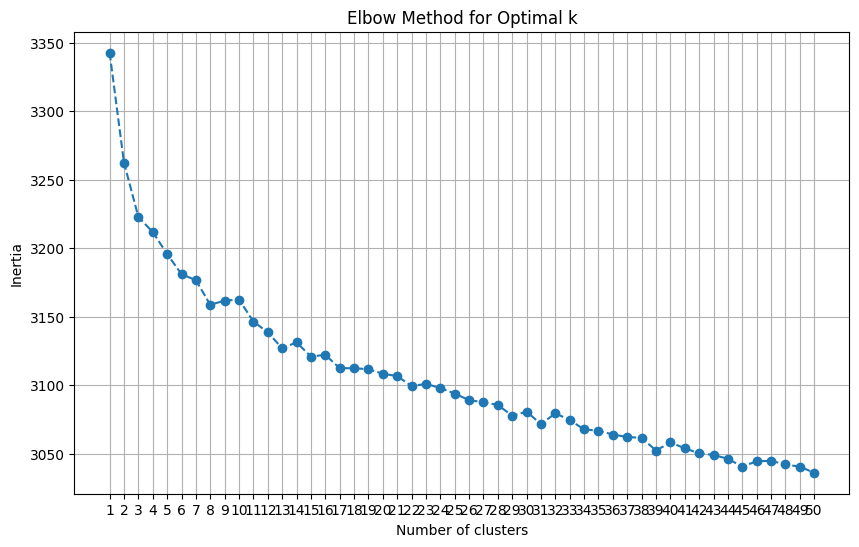

In [20]:


import matplotlib.pyplot as plt

# inertia(관성) 계산
inertia = []
for k in range(1, 51):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Elbow 포인트 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 51))
plt.grid(True)
plt.show()

In [243]:
from sklearn.metrics import silhouette_score

# 클러스터 개수별로 실루엣 계수 계산
silhouette_scores = []
for k in range(21, 40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 결과 출력
for k, score in enumerate(silhouette_scores, start=2):
    print(f"Cluster {k}: Silhouette Score = {score:.4f}")

C:\Users\ksz07\anaconda3\envs\38envi\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksz07\anaconda3\envs\38envi\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksz07\anaconda3\envs\38envi\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksz07\anaconda3\envs\38envi\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

Cluster 2: Silhouette Score = 0.0376
Cluster 3: Silhouette Score = 0.0382
Cluster 4: Silhouette Score = 0.0340
Cluster 5: Silhouette Score = 0.0369
Cluster 6: Silhouette Score = 0.0380
Cluster 7: Silhouette Score = 0.0350
Cluster 8: Silhouette Score = 0.0349
Cluster 9: Silhouette Score = 0.0393
Cluster 10: Silhouette Score = 0.0399
Cluster 11: Silhouette Score = 0.0391
Cluster 12: Silhouette Score = 0.0368
Cluster 13: Silhouette Score = 0.0396
Cluster 14: Silhouette Score = 0.0402
Cluster 15: Silhouette Score = 0.0403
Cluster 16: Silhouette Score = 0.0370
Cluster 17: Silhouette Score = 0.0393
Cluster 18: Silhouette Score = 0.0376
Cluster 19: Silhouette Score = 0.0419
Cluster 20: Silhouette Score = 0.0426


In [ ]:
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    print(X)

In [60]:
pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------- ------------------------ 61.4/162.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.5 MB 7.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.4/7.5 MB 4.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.5 MB 4.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.5 MB 4.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.5 MB 4.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.5 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.5 MB 5.1 MB/s eta 0:00:02
   --------- ------------------------------ 1.7/7.5 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.2/7.5 MB 5.1 MB/s eta 0:00:02
   -----------

DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
